# Introduction and Definitions
Climate change is a change in the statistical distribution of weather patterns when that change lasts for an extended period of time (i.e., decades to millions of years).

“Global warming” refers to the long-term warming of the planet. Global temperature shows a well-documented rise since the early 20th century and most notably since the late 1970s. Worldwide, since 1880 the average surface temperature has gone up by about 0.8 °C (1.4 °F), relative to the mid-20th-century baseline (of 1951-1980). 

Feature Definitions

Fuel oil/Diesel Oil : is a fraction obtained from petroleum distillation, either as a distillate or a residue.

Carbond Dioxide Emission : Carbon dioxide (CO2) is an important trace gas in Earth's atmosphere currently constituting about 0.04% (400 parts per million) of the atmosphere. Despite its relatively small concentration, CO2 is a potent greenhouse gas and plays a vital role in regulating Earth's surface temperature through radiative forcing and the greenhouse effect.

# About The Project

In this project,I tried to answer some global questions about Climate Change issue.I investigated to Climate Change datasets for identifying relations between countries and related CO2 emission variables.

By the way, this project is just a portfolio working for my Data Science skill in Python.So please do not evaluate to the results  seriously from a reality perspective.I am not a geology/meteorology or political expert.I am a industrial engineer.

In this project, I will do EDA analysis,detailed and complex data queries ,data manipulations-transforms and the finally visualization reports as summary of the results.

# Collecting Data

Firstly I have looked to World Bank's data website for climate change datasets.But when I checked to datasets ,I identified to multiple null values.After then I made a research for the project issue in Google and USA government web sites legally.But the datasets was too complex (needed to assist from a expert) for a lean data analysis and I also hesitated to copyright permissions.After all finally, I decided to collect to the datasets from United Nations Data Website.

In [1]:
#AUTHOR : Osman EMRE


#Importing package libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')
%matplotlib inline

In [2]:
#Reading and loading datasets

gas_diesel = pd.read_csv(r'C:\Users\osman\Desktop\data scientist\pandas portfolio\gas_diesel.csv')
carbon_ems = pd.read_csv(r'C:\Users\osman\Desktop\data scientist\pandas portfolio\carbon.csv')

In [3]:
#Filtering the Gas oil/Diesel oil  dataset  with production,final consumption and transformation values.
gas_diesel_df = gas_diesel[(gas_diesel['Commodity - Transaction'] == 'Gas Oil/ Diesel Oil - Final consumption') | 
                           (gas_diesel['Commodity - Transaction']
                            ==  'Gas Oil/ Diesel Oil - Production') | (gas_diesel['Commodity - Transaction']
                                                                == 'Gas Oil/ Diesel Oil - Transformation') ]

In [4]:
#Bring the filtered values
gas_diesel_df['Commodity - Transaction'].unique()

array(['Gas Oil/ Diesel Oil - Transformation',
       'Gas Oil/ Diesel Oil - Final consumption',
       'Gas Oil/ Diesel Oil - Production'], dtype=object)

In [5]:
#Preview the Gas Oil / Diesel Oil dataset
gas_diesel_df.head()

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
24,Afghanistan,Gas Oil/ Diesel Oil - Transformation,2013,"Metric tons, thousand",20,1
25,Afghanistan,Gas Oil/ Diesel Oil - Transformation,2012,"Metric tons, thousand",20,NaN
26,Afghanistan,Gas Oil/ Diesel Oil - Transformation,2011,"Metric tons, thousand",20,NaN
27,Afghanistan,Gas Oil/ Diesel Oil - Transformation,2010,"Metric tons, thousand",20,NaN
28,Afghanistan,Gas Oil/ Diesel Oil - Transformation,2009,"Metric tons, thousand",20,1


In [6]:
#Delete the redundant column value
gdf = gas_diesel_df.drop('Quantity Footnotes',axis = 1)
gdf.head()

,Country or Area,Commodity - Transaction,Year,Unit,Quantity
24,Afghanistan,Gas Oil/ Diesel Oil - Transformation,2013,"Metric tons, thousand",20
25,Afghanistan,Gas Oil/ Diesel Oil - Transformation,2012,"Metric tons, thousand",20
26,Afghanistan,Gas Oil/ Diesel Oil - Transformation,2011,"Metric tons, thousand",20
27,Afghanistan,Gas Oil/ Diesel Oil - Transformation,2010,"Metric tons, thousand",20
28,Afghanistan,Gas Oil/ Diesel Oil - Transformation,2009,"Metric tons, thousand",20


# EDA Analysis

The goal of EDA is to discover patterns in data.EDA was created by statistician John Tukey.EDA's method is split-apply-combine dataset.For this goal I used to lists,lists of objects and dataframes and its functions in Pandas package.I used to this method to answer for general climate change questions between Countries and CO2 emission and Gas-Diesel oil variables.

In [7]:
#What are the  top five Countries for the most gas oil production and consumption for all past years ?.

comp = gdf['Commodity - Transaction'] == 'Gas Oil/ Diesel Oil - Final consumption'
product = gdf['Commodity - Transaction'] ==  'Gas Oil/ Diesel Oil - Production'
gdshow = gdf[['Country or Area','Quantity']] [( (comp) | (product) )].groupby(by = 'Country or Area').sum()
gdtopfive =  gdshow.sort_values(by='Quantity', axis = 0,ascending = False)
gdtopfive.head(5)

,Quantity
Country or Area,
United States,8518140.000
China,4017168.252
Japan,2615258.000
Germany,2363351.000
India,2017587.000


In [8]:
gdf['Year'].unique()

array([ 2013.,  2012.,  2011.,  2010.,  2009.,  2008.,  2007.,  2006.,
        2005.,  2004.,  2003.,  2002.,  2001.,  2000.,  1999.,  1998.,
        1997.,  1996.,  1995.,  1994.,  1993.,  1992.,  1991.,  1990.])

In [9]:
#Bring the last ten years data for the total gas/diesel oil production and consumption

temp = gdf[ ((comp) | (product)) ].groupby (by = 'Year').sum()
gdlast=temp.sort_values(by='Quantity',ascending = False)
gdlast.head(11)

,Quantity
Year,
2013,2508140.561756
2012,2488127.313808
2011,2439283.027778
2010,2380949.541262
2008,2369557.497083
2009,2321601.491304
2007,2292060.706308
2006,2244566.261720
2005,2205362.210919


In [10]:
#Bring on the last five years, top five Countries data for the gas/diesel oil production and consumption.

g1=gdf.sort_values(by='Year',ascending = False)
g_qt_max_order= g1.sort_values (by='Quantity',ascending = False)
g3 = g_qt_max_order['Country or Area'].drop_duplicates()  [(g_qt_max_order['Year'] > 2008 ) & ((comp) | (product)) ]
g3.head(5)

86818         United States
15458                 China
37685                 India
68511    Russian Federation
10636                Brazil
Name: Country or Area, dtype: object

In [11]:
#Bring the top five Countries data for the gas/diesel oil production and transformation.

gtf = g_qt_max_order['Commodity - Transaction'] == 'Gas Oil/ Diesel Oil - Transformation'
gtemp=g_qt_max_order[['Country or Area','Quantity']] [(gtf) | (product)].groupby(by = 'Country or Area').sum()
gtopmaxtrm=gtemp.sort_values(by='Quantity',ascending = False)
gtopmaxtrm.head(5)

,Quantity
Country or Area,
United States,4518903.0
China,2142713.3
Japan,1375450.0
Russian Federation,1305744.0
India,1106277.0


In [12]:
# After 2000 , bring the top five Countries data for the gas/diesel oil production and consumption.

gtemp=g_qt_max_order[ ( (g_qt_max_order['Year'] > 2000 ) & ((product) | (comp)) ) ].groupby(by='Country or Area').sum()
gtop2000 = gtemp.sort_values(by='Quantity',ascending = False)
gtop2000['Quantity'].head(5)

Country or Area
United States    5060695.000
China            3137689.252
India            1442850.000
Japan            1316373.000
Germany          1301953.000
Name: Quantity, dtype: float64

In [13]:
#Bring the carbon emission dataset and prepare it for analysis.

carbon_ems1 = carbon_ems.drop('Value Footnotes',axis=1)
carbon_ems1.head()

,Country or Area,Year,Value
0,Afghanistan,2011,12251.447
1,Afghanistan,2010,8470.770
2,Afghanistan,2009,6776.616
3,Afghanistan,2008,4217.050
4,Afghanistan,2007,2280.874


In [14]:
# Bring on the last ten years, total co2 emission data for all countries.

temp=carbon_ems1.groupby(by='Year').sum()
totalco2=temp.sort_index(axis = 0,ascending = False)
totalco2.iloc[0:11]

,Value
Year,
2011,32425572.178
2010,31347114.812
2009,29943944.596
2008,30022180.041
2007,29494069.702
2006,28725206.145
2005,27771775.144
2004,27021752.633
2003,25724760.402


In [15]:
#Bring on the last five years,top five co2 emission data for the countries. 

temp = carbon_ems1 [carbon_ems1['Year']>2006].groupby(by='Country or Area').sum()
temp1=temp.drop('Year',axis=1)
top5co2=temp1.sort_values(by='Value',ascending =False)
top5co2.head(5)

,Value
Country or Area,
China,38795946.917
United States,27405958.891
India,9395389.382
Russian Federation,8508217.404
Japan,5915094.687


In [16]:
#Bring on the last ten years,top five co2 emission data for the countries.

temp = carbon_ems1 [carbon_ems1['Year']>2000].groupby(by='Country or Area').sum()
temp1=temp.drop('Year',axis=1)
top5last10co2=temp1.sort_values(by='Value',ascending =False)
top5last10co2.head(5)

,Value
Country or Area,
China,67995578.521
United States,61597803.958
Russian Federation,18117110.527
India,17371954.125
Japan,13299196.908


# Combining the Results

With this purpose, I created a three dataframe with csv format.I used to csv format file because of
according to lead developer of Pandas package  Mr. McKinney ; csv files are better than other files for fast data processing.First  dataframe "topgasdf" is about gas/diesel oil quantity values , second dataframe  "last10co2gas" shows carbon dioxide emission and gas/diesel oil production and consumption relationships according to last ten years and third dataframe 
"countrytop5co2gas" shows top co2 emission values for last five years with the matching countries.

In [17]:
topgasdf = pd.read_csv(r'C:\Users\osman\Desktop\data scientist\pandas portfolio\topgas.csv')
topgasdf.drop('Unnamed: 5',axis=1)

,Countries,TopFiveProdConsAllYears,TopFiveCountryProdConsLastFiveYears,TopFiveProdTrfmAllYears,TopFiveProdCons2000
0,United States,8518140.000,United States,4518903.0,5060695.000
1,China,4017168.252,China,2142713.3,3137689.252
2,Japan,2615258.000,India,1375450.0,1316373.000
3,Germany,2363351.000,Russian Federation,NaN,1301953.000
4,India,2017587.000,Brazil,1106277.0,1442850.000
5,Russian Federation,NaN,NaN,1375450.0,NaN


In [18]:
last10co2gas =   pd.read_csv(r'C:\Users\osman\Desktop\data scientist\pandas portfolio\last10co2gas.csv')
last10co2gas.drop('Unnamed: 3',axis = 1)

,Year,co2emission,gasprodcons
0,2013,32425572.178,2508140.561756
1,2012,31347114.812,2488127.313808
2,2011,29943944.596,2439283.027778
3,2010,30022180.041,2380949.541262
4,2009,29494069.702,2369557.497083
5,2008,28725206.145,2321601.491304
6,2007,27771775.144,2292060.706308
7,2006,27021752.633,2244566.261720
8,2005,25724760.402,2205362.210919
9,2004,24360225.698,2153182.772229


In [19]:
countrytop5co2gas =   pd.read_csv(r'C:\Users\osman\Desktop\data scientist\pandas portfolio\co2gas.csv')
countrytop5co2gas.drop('Unnamed: 3',axis = 1)

,Country,last5yearstop5co2em,last10yearstop5co2em
0,China,38795946.917,67995578.521
1,United States,27405958.891,61597803.958
2,India,9395389.382,17371954.125
3,Russian Federation,8508217.404,18117110.527
4,Japan,5915094.687,13299196.908


# Data Visualization and Summary Reports

In this section , I used to Seaborn visual package for fast and efficient visualization.This package has useful and practical options for business,academic or any other data science projects.First bar chart illustrates top five countries  are with gas/diesel oil production for all years,second top five countries are with production and transform for all years and third ...

In [20]:
import seaborn as sns
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

:0: FutureWarning: IPython widgets are experimental and may change in the future.


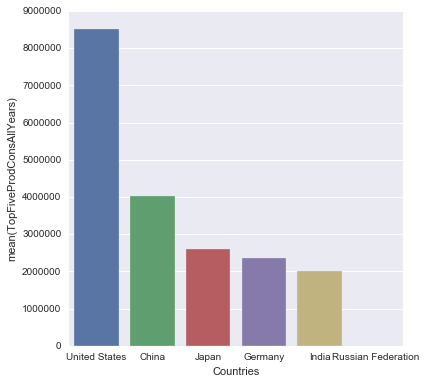

In [21]:
sns.barplot(x='Countries',y='TopFiveProdConsAllYears',data=topgasdf )

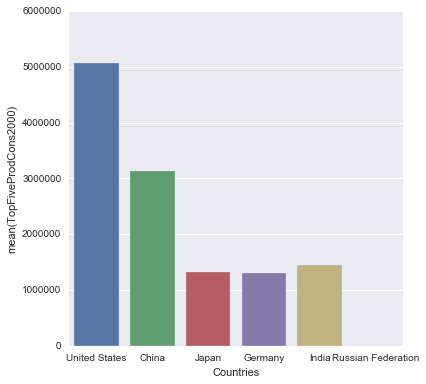

In [22]:
#After year 2000,top five gas/diesel oil production and consumption for countries.

sns.barplot(y='TopFiveProdCons2000',x='Countries',data=topgasdf )

#TopFiveCountryProdConsLastFiveYears>>US,China,India,Russia,Brazil

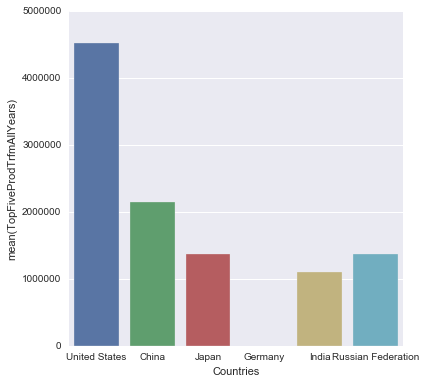

In [23]:
#Top five countries with the Gas/Diesel oil production and transformation for past all years.
#At here,Russian Federation calls to attention.

sns.barplot(y='TopFiveProdTrfmAllYears',x='Countries',data=topgasdf )

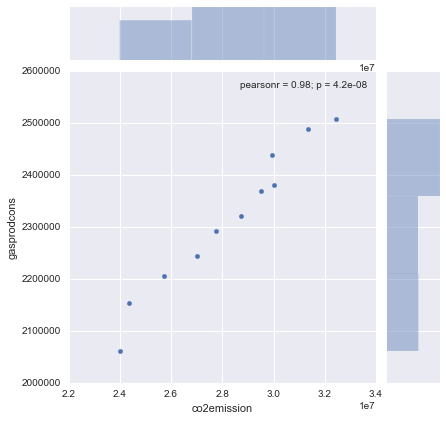

In [24]:
#Co2 emission and gas/diesel oil production and consumption scatter plot.At the recently years, linear relationship just 
#a little broke up to gas production-consumption side.This is a good signal for reducing co2 emission.

sns.jointplot(x='co2emission',y='gasprodcons',data =last10co2gas )

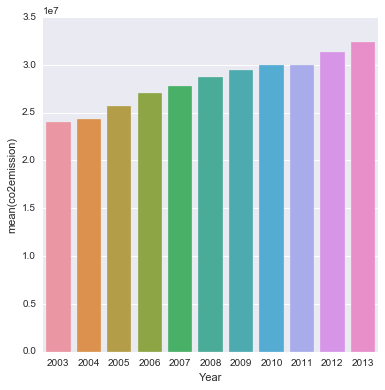

In [25]:
# Multiple bar chart shows the variation of Co2 emission on the last years to until 2014.

sns.barplot(x='Year',y='co2emission',data =last10co2gas )

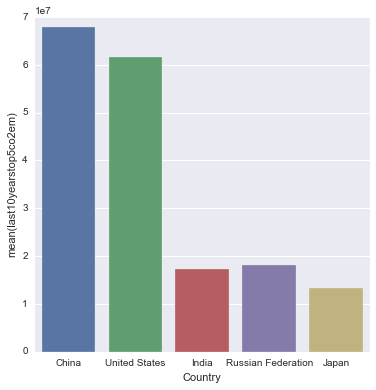

In [26]:
#On the last 10 years  top five countries with co2 emission  values.

sns.barplot(x='Country',y='last10yearstop5co2em',data =countrytop5co2gas )

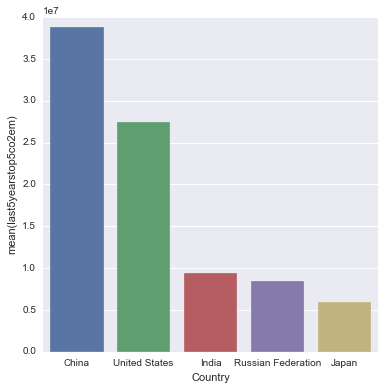

In [27]:
#On the last 10 years  top five countries with co2 emission  values

sns.barplot(x='Country',y='last5yearstop5co2em',data =countrytop5co2gas )

# Final Evaluation

*After year 2000, India significantly  has increased to Gas/diesel production and consumption according to Germany 
and Japan.Maybe for India , air pollution test analysis by a expert  might be a good idea.

*United States made a good improvement for reducing co2 emission on recently years.Maybe other countries can use USA's battle method with co2 emission.

*After year 2008, co2 emission lost its speed.This is a good signal.
Do not attach to 2012 and 13 years.I have just made a little fit for null values.

*Finally China, has a big problem  and deal with co2 emission.But also other factors can affect to co2 emission.As i mentioned before that I am not a meteorology expert.It is just a portfolio working do not take seriously.

In this project for data analysis I reviewed to 95 thousand rows closely.I used to Python ve Pandas's advanced features for efficient and fast analysis.
Our World needs more and more data  and data science projects.I think,  we can change to our future brightly.And for this purpose United Nations are doing avesome things like Data Science challenge and competitions.